# Customer Churn Prediction

## 1. Setup Notebook

In [1]:
# connect to google drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
PATH = '/content/drive/MyDrive/Binar/Challenge 2'
os.chdir(PATH)

Mounted at /content/drive


## 2. Data Understanding

### 2.1. Import Library

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

### 2.2. Import Data

#### 2.2.1. Training Data

In [3]:
# define data
df_train = pd.read_csv("train.csv")

In [ ]:
# show data
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
# numbers of rows and columns
df_train.shape

(4250, 20)

The training data has 4,250 rows and 20 columns.

In [ ]:
# data info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

#### 2.2.2. Testing Data

In [ ]:
# define data
df_test = pd.read_csv("test.csv")

In [ ]:
# show data
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
# numbers of rows and columns
df_test.shape

(750, 20)

The testing data has 750 rows and 20 columns.

In [ ]:
# data info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

## 3. Exploratory Data Analysis (EDA)

### 3.1. Descriptive Statistics

In [ ]:
df_train.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.24,39.70,1.0,73.00,100.00,127.00,243.00
number_vmail_messages,4250.0,7.63,13.44,0.0,0.00,0.00,16.00,52.00
total_day_minutes,4250.0,180.26,54.01,0.0,143.33,180.45,216.20,351.50
total_day_calls,4250.0,99.91,19.85,0.0,87.00,100.00,113.00,165.00
total_day_charge,4250.0,30.64,9.18,0.0,24.36,30.68,36.75,59.76
total_eve_minutes,4250.0,200.17,50.25,0.0,165.92,200.70,233.78,359.30
total_eve_calls,4250.0,100.18,19.91,0.0,87.00,100.00,114.00,170.00
total_eve_charge,4250.0,17.02,4.27,0.0,14.10,17.06,19.87,30.54
total_night_minutes,4250.0,200.53,50.35,0.0,167.22,200.45,234.70,395.00
total_night_calls,4250.0,99.84,20.09,0.0,86.00,100.00,113.00,175.00


There are 4,250 data in each column with a total of 20 columns.

### 3.2. Heatmap

In [ ]:
# split categorical and numerical columns
cat = df_train.select_dtypes(include='object').columns
num = df_train.select_dtypes(include='number').columns

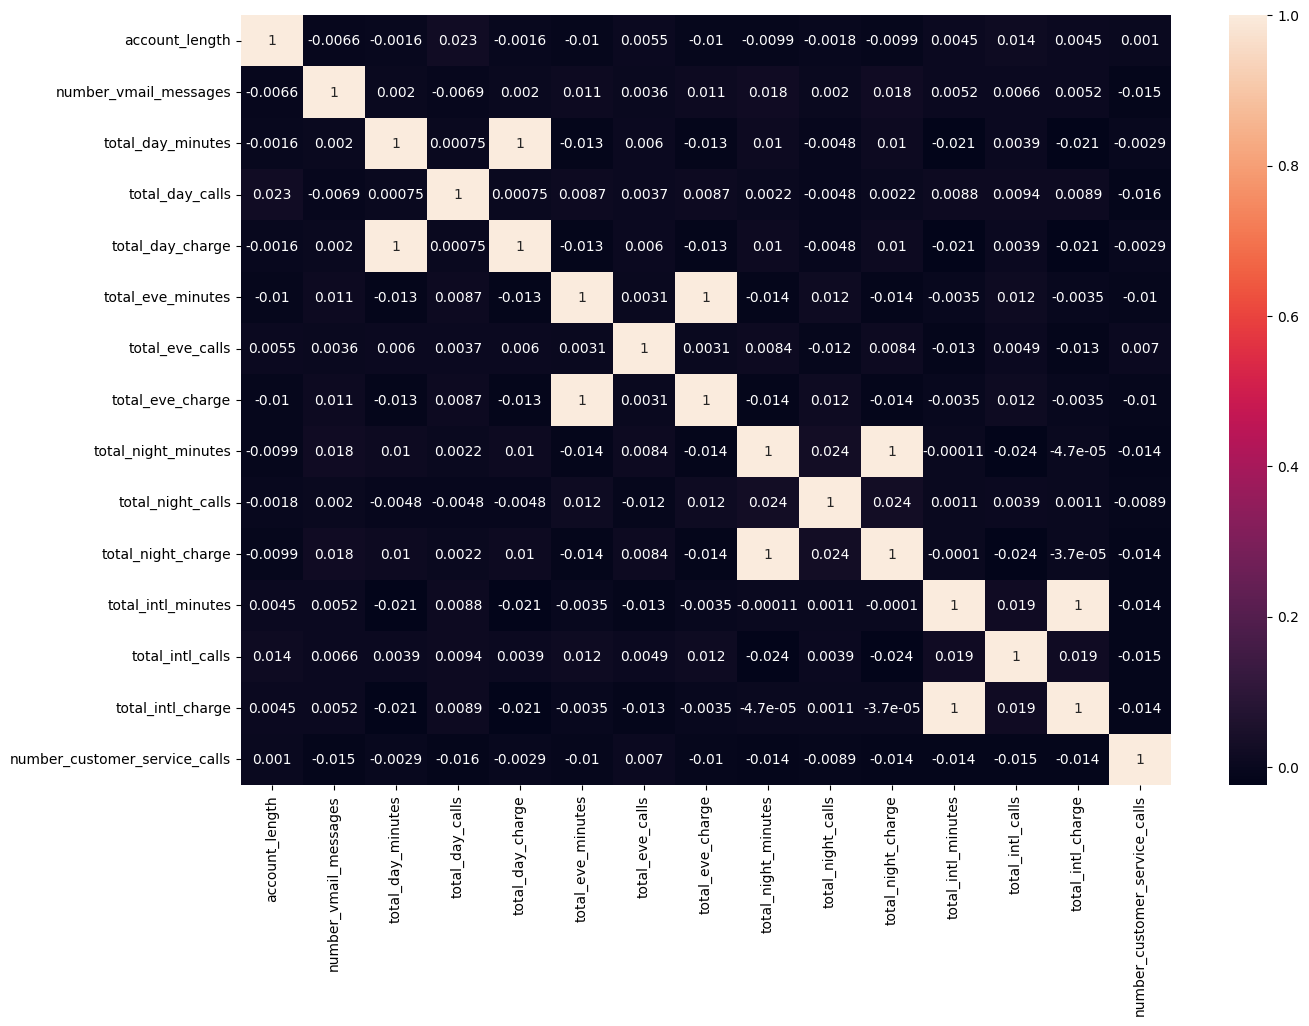

In [ ]:
# set figure size
plt.figure(figsize=(15,10))

# create heatmap
sns.heatmap(df_train[num].corr(), annot=True)

# show plot
plt.show()

The greater the correlation value, the stronger the correlation between variables. The strong correlation in this data is as follows.
* Total day charge and total day minutes.
* Total eve charge and total eve minutes.
* Total night charge and total night minutes.
* Total intl charge and total intl minutes.

### 3.3. Pie Chart

In [14]:
# calculate total churn in percentage
def pie_label(pct, x):
    value = round(pct / 100.*np.sum(x))
    return '{:d}\n({:.0f}%)'.format(value, pct)

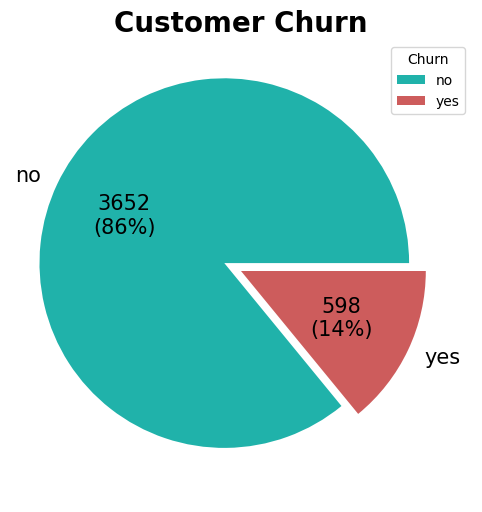

In [15]:
# set figure size
plt.figure(figsize=(9,6))

# calculate counts of each category in 'churn'
churn = df_train['churn'].value_counts()

# define colors and explode
colors = ['lightseagreen', 'indianred']
explode = [0.1, 0]

# create pie chart
plt.pie(churn, labels=churn.index, autopct=lambda pct: pie_label(pct, churn), colors=colors, explode=explode, textprops=dict(color='black', fontsize=15))
plt.title("Customer Churn", loc='center', weight='bold', fontsize=20)
plt.legend(title='Churn')

# show chart
plt.show()

Only 14% or 598 customers had churn.

### 3.4. Bar Chart

#### 3.4.1. Total Churn per Area Code

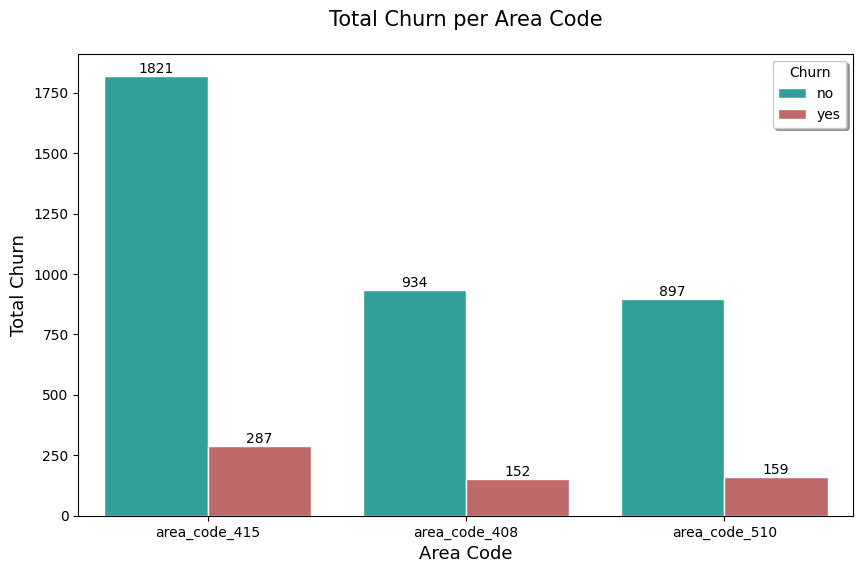

In [ ]:
# set figure size
fig, ax = plt.subplots(figsize=(10,6))

# create countplot
sns.countplot(data = df_train, x='area_code', hue='churn', palette=colors, edgecolor='white')

# add labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge')

# create bar chart
plt.title('Total Churn per Area Code', pad=20, fontsize=15)
plt.xlabel('Area Code', fontsize=13)
plt.ylabel('Total Churn', fontsize=13)
plt.legend(title='Churn', shadow=True)

# show chart
plt.show()

The most churn customers are in area code 415.

#### 3.4.2. Total Churn per International Plan

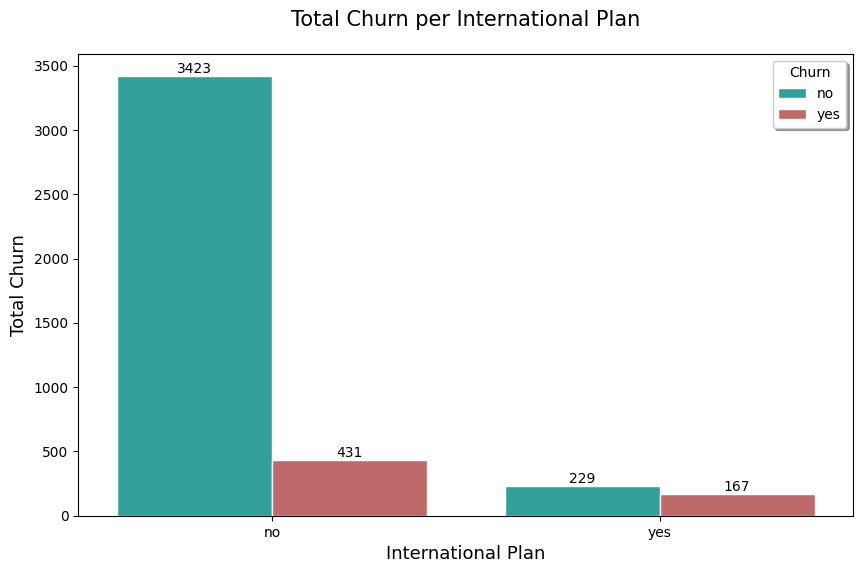

In [28]:
# set figure size
fig, ax = plt.subplots(figsize=(10,6))

# create countplot
sns.countplot(data = df_train, x='international_plan', hue='churn', palette=colors, edgecolor='white')

# add labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge')

# create bar chart
plt.title('Total Churn per International Plan', pad=20, fontsize=15)
plt.xlabel('International Plan', fontsize=13)
plt.ylabel('Total Churn', fontsize=13)
plt.legend(title='Churn', shadow=True)

# show chart
plt.show()

The most churn customers don't have an international plan.

#### 3.4.3. Total Churn per Voice Mail Plan

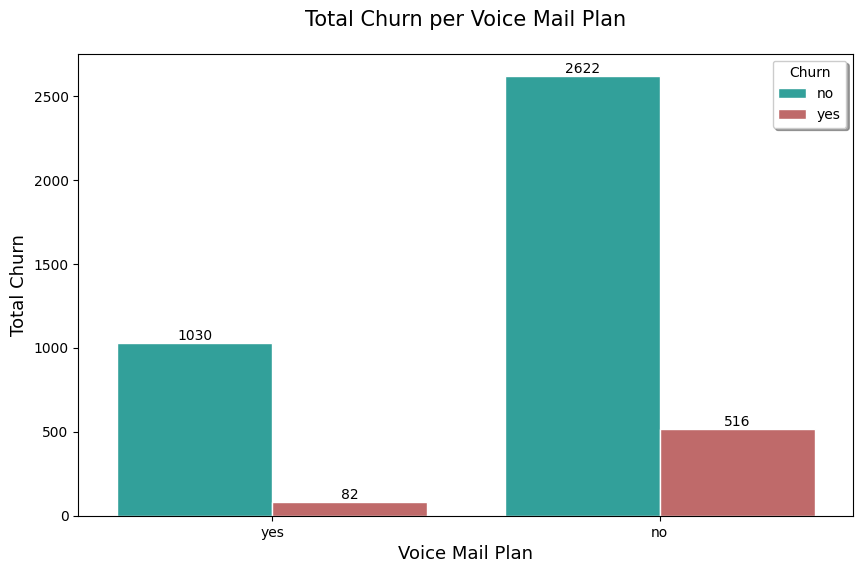

In [18]:
# set figure size
fig, ax = plt.subplots(figsize=(10,6))

# create countplot
sns.countplot(data = df_train, x='voice_mail_plan', hue='churn', palette=colors, edgecolor='white')

# add labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge')

# create bar chart
plt.title('Total Churn per Voice Mail Plan', pad=20, fontsize=15)
plt.xlabel('Voice Mail Plan', fontsize=13)
plt.ylabel('Total Churn', fontsize=13)
plt.legend(title='Churn', shadow=True)

# show chart
plt.show()

The most churn customers don't have a voice mail plan.

#### 3.4.4. Total Churn per Account Length

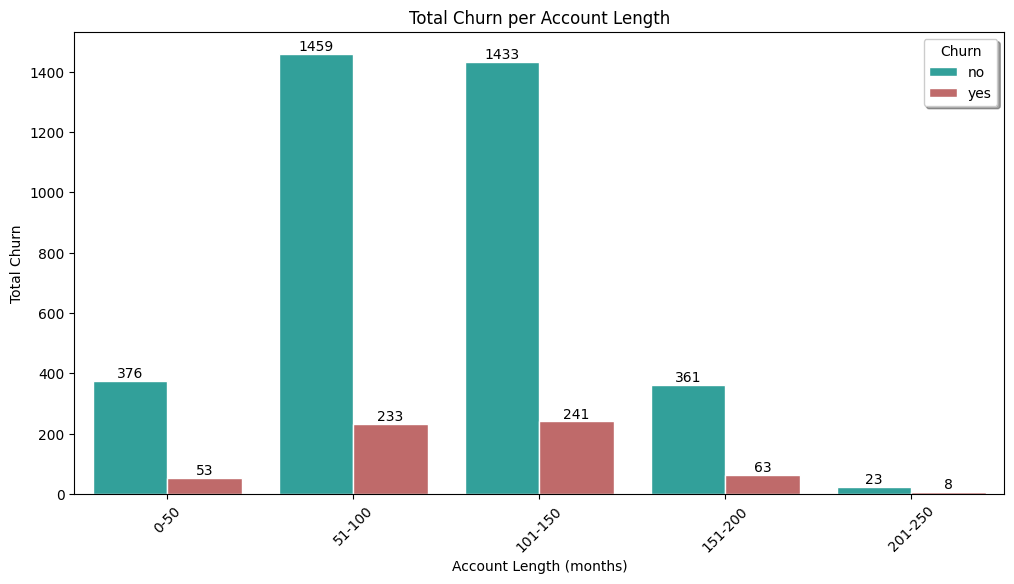

In [50]:
# split account_length into bins
bins = [0, 50, 100, 150, 200, 250]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250']
df_train['account_length_bin'] = pd.cut(df_train['account_length'], bins=bins, labels=labels, right=False)

# create bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='account_length_bin', hue='churn', palette=colors, edgecolor='white')

# add labels
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.title('Total Churn per Account Length')
plt.xlabel('Account Length (months)')
plt.ylabel('Total Churn')
plt.xticks(rotation=45)
plt.legend(title='Churn', shadow=True)

# show chart
plt.show()

The most churn customers have an account length of 101-150 months.

### 3.5. Boxplot

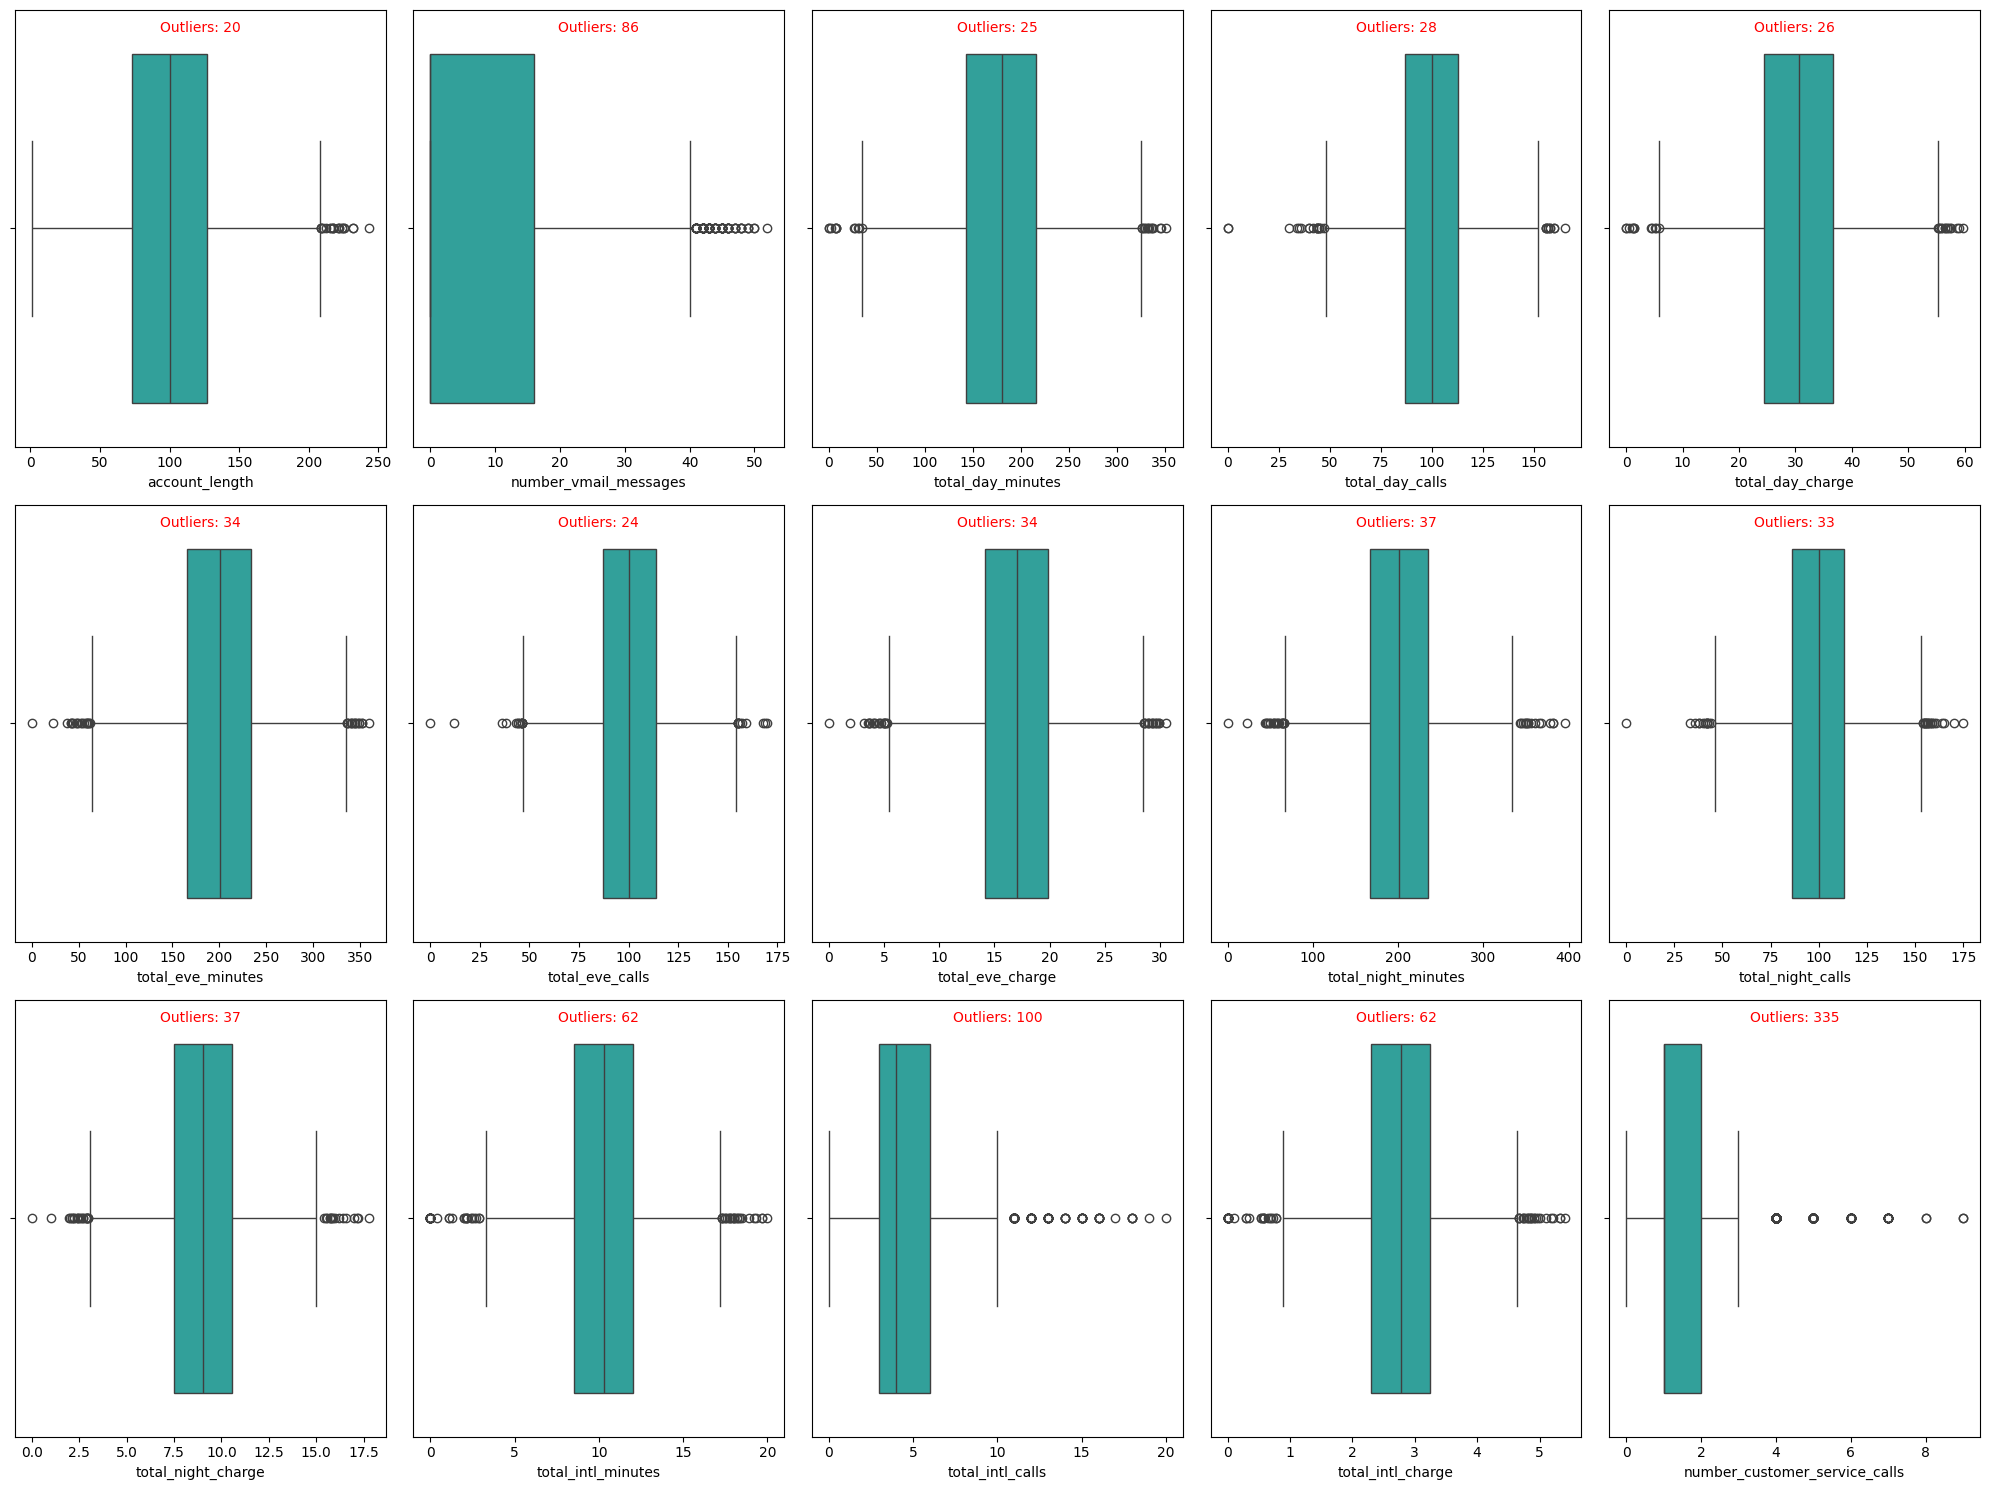

In [ ]:
# number of rows
num_rows = (len(df_train[num].columns) + 2) // 5

# create subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20,15))

# create boxplot
for i, col in enumerate(df_train[num].columns):
    ax = axes[i // 5, i % 5]
    sns.boxplot(data=df_train[num], x=col, ax=ax, color='lightseagreen')
    # identify outliers
    outliers = df_train[num][col][
        (df_train[num][col] < df_train[num][col].quantile(0.25) - 1.5 * (df_train[num][col].quantile(0.75) - df_train[num][col].quantile(0.25))) |
        (df_train[num][col] > df_train[num][col].quantile(0.75) + 1.5 * (df_train[num][col].quantile(0.75) - df_train[num][col].quantile(0.25)))
    ]
    # count number of outliers
    num_outliers = len(outliers)
    # annotate number of outliers
    ax.annotate(f'Outliers: {num_outliers}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=10, color='red')

# adjust layout
plt.tight_layout()

# show plot
plt.show()

Outliers are data points that lie beyond the whiskers, represented by circles. They indicate values that deviate significantly from the rest of the data. All the columns above have outliers. This means there is a spike in the number of customer calls to the customer service center.

### 3.6. Histogram

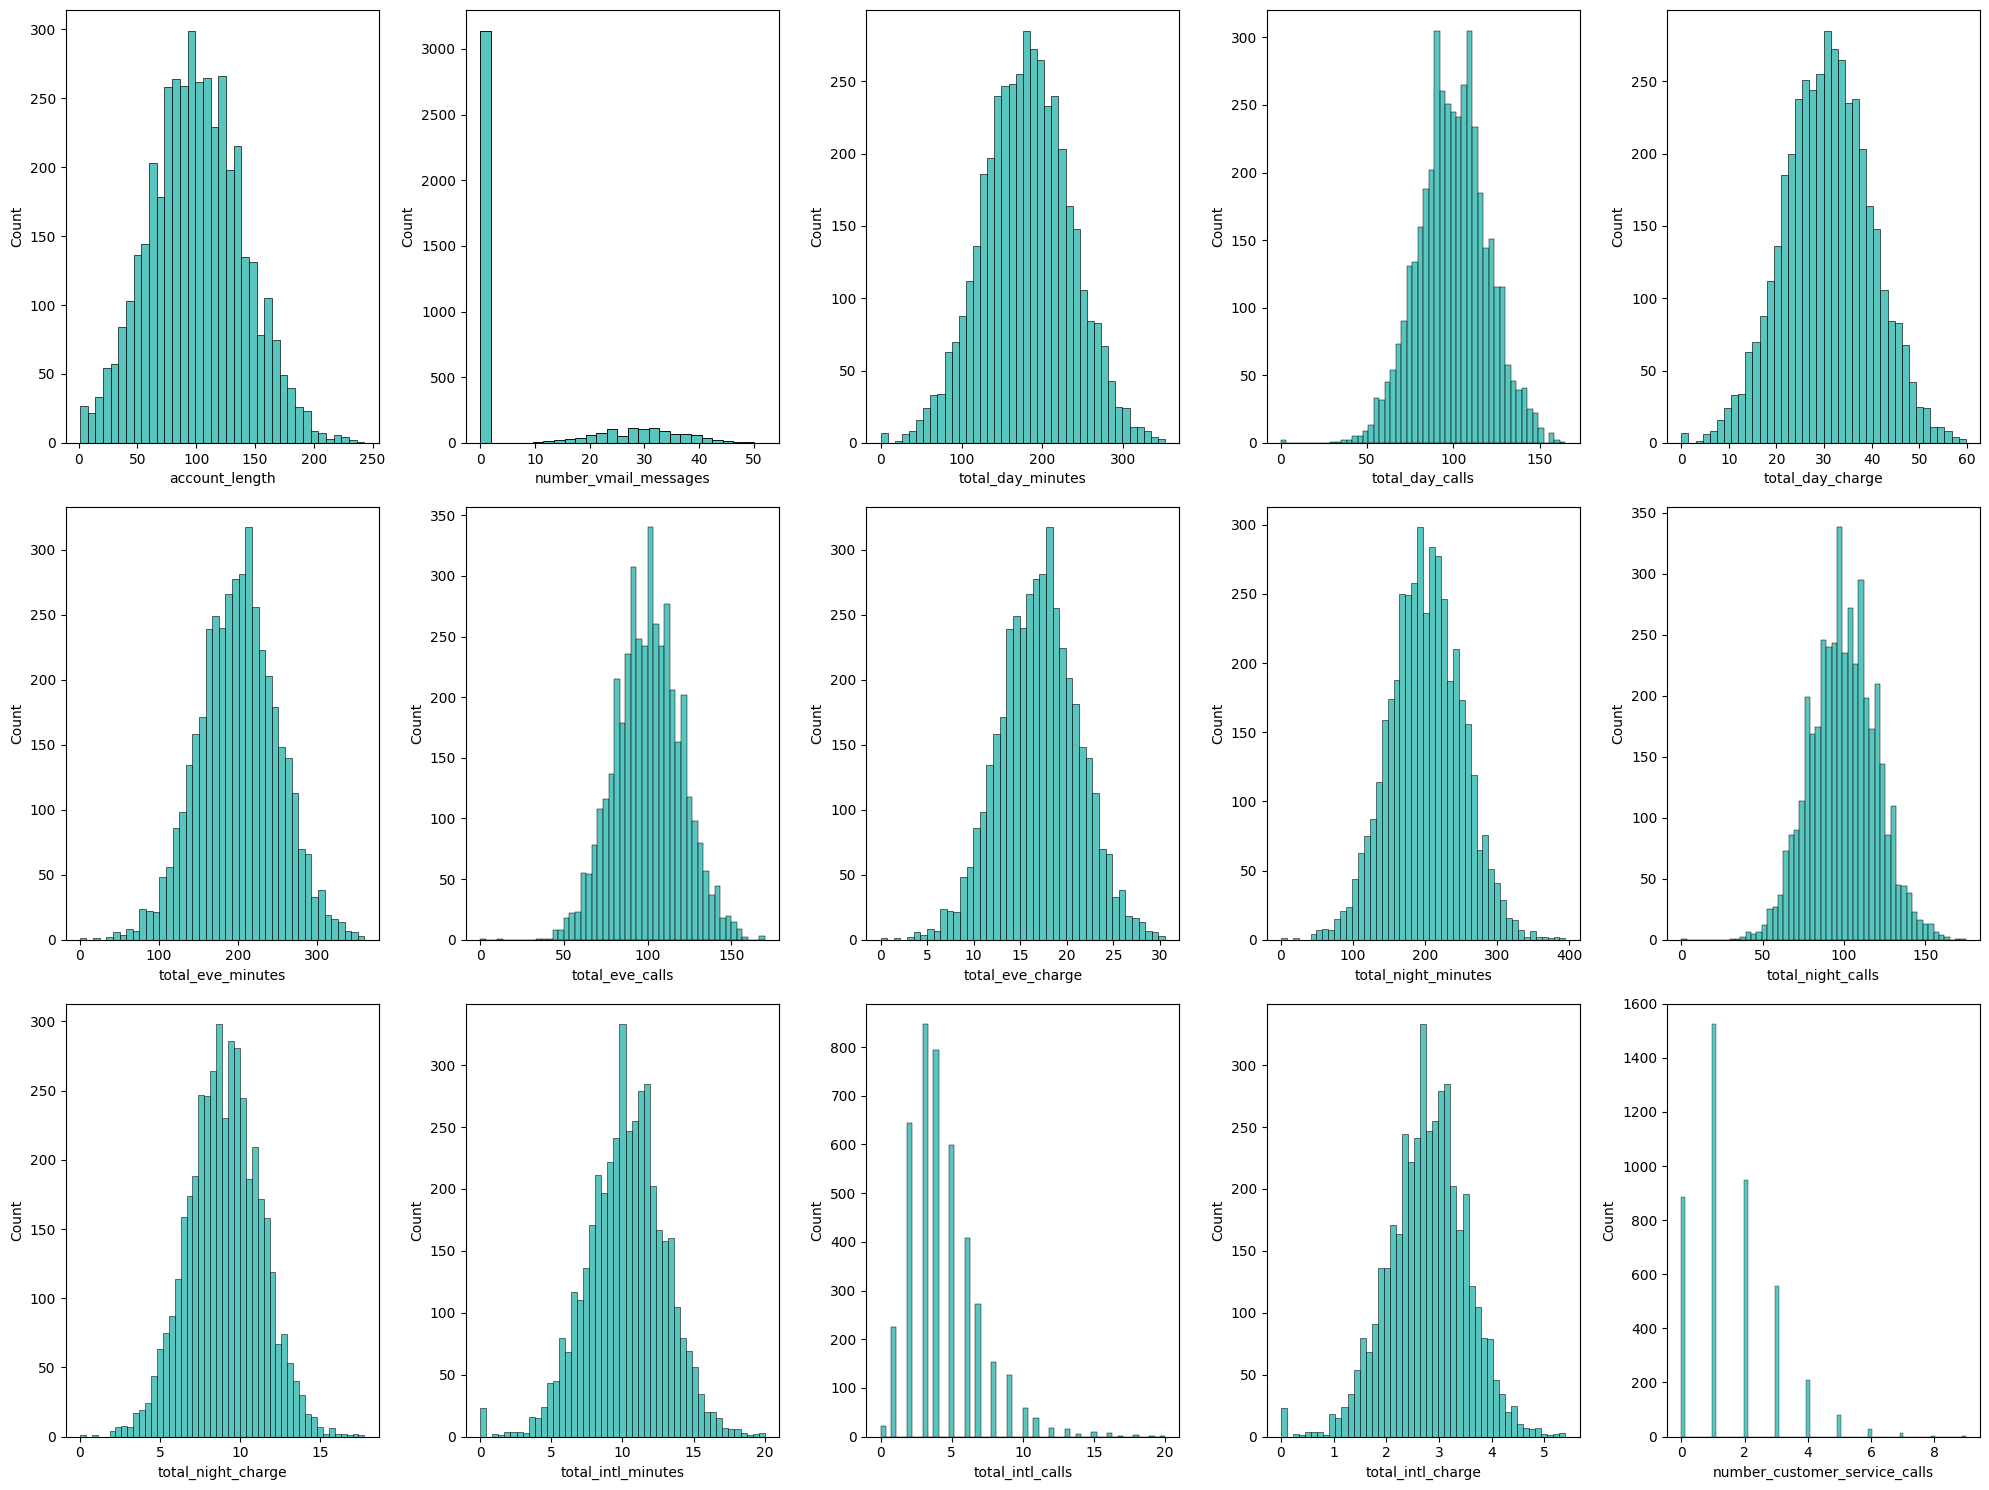

In [ ]:
# number of rows
num_rows = (len(df_train[num].columns) + 2) // 5

# create subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20,15))

# create histogram
for i, col in enumerate(df_train[num].columns):
    sns.histplot(data=df_train[num], x=col, ax=axes[i // 5, i % 5], color='lightseagreen')

# adjust layout
plt.tight_layout()

# show plot
plt.show()

Columns are mainly normally distributed. Columns number vmail messages, total intl calls, and number customer service calls have right-skewed curves. This can occur due to extreme values very far from the average.

### 3.7. Density Plot

#### 3.7.1. Distribution of Total Day Minutes and Churn

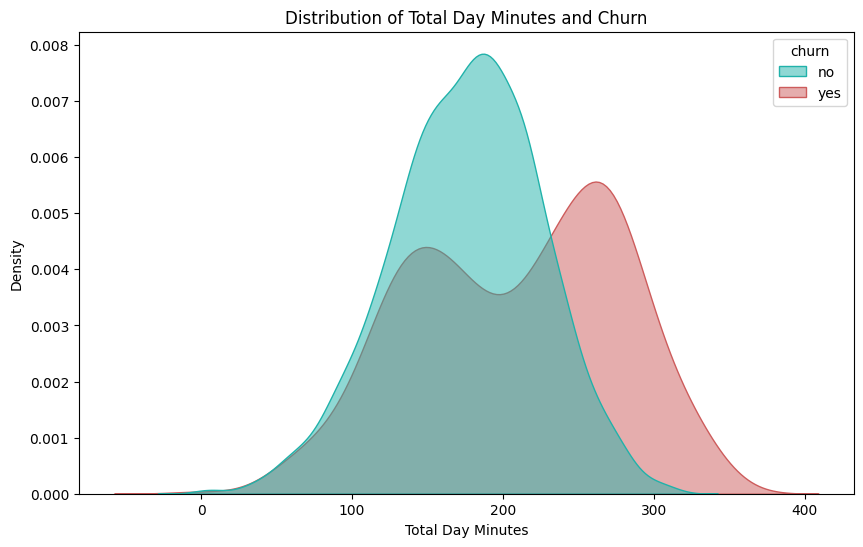

In [24]:
# set figure size
plt.figure(figsize=(10, 6))

# density plot
sns.kdeplot(data=df_train, x='total_day_minutes', hue='churn', fill=True, common_norm=False, alpha=0.5, palette=colors)
plt.title('Distribution of Total Day Minutes and Churn')
plt.xlabel('Total Day Minutes')
plt.ylabel('Density')

# show plot
plt.show()

Based on the total minutes of day calls, customers who churn generally have higher total daily minutes than those who don't.

#### 3.7.2. Distribution of Total Eve Minutes and Churn

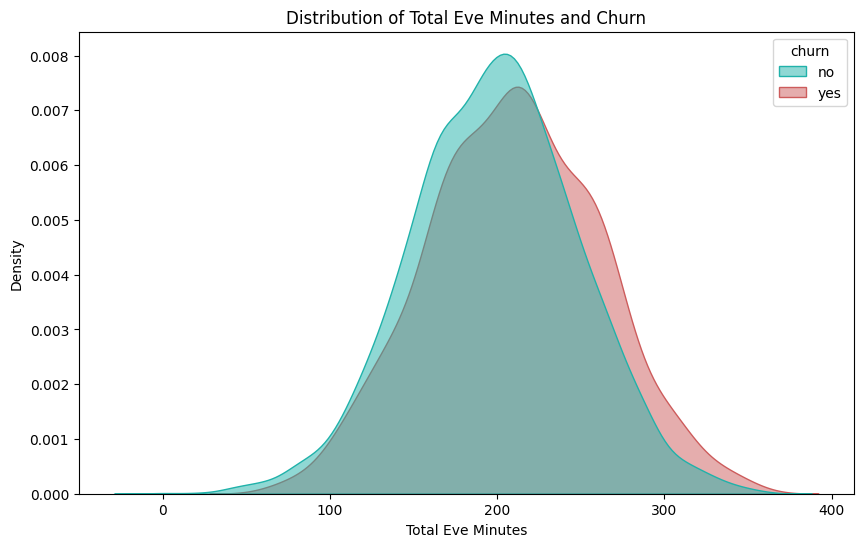

In [38]:
# set figure size
plt.figure(figsize=(10, 6))

# density plot
sns.kdeplot(data=df_train, x='total_eve_minutes', hue='churn', fill=True, common_norm=False, alpha=0.5, palette=colors)
plt.title('Distribution of Total Eve Minutes and Churn')
plt.xlabel('Total Eve Minutes')
plt.ylabel('Density')

# show plot
plt.show()

Based on the total minutes of evening calls, there is no noticeable difference between customers who churn and those who don't.

#### 3.7.3. Distribution of Total Night Minutes and Churn

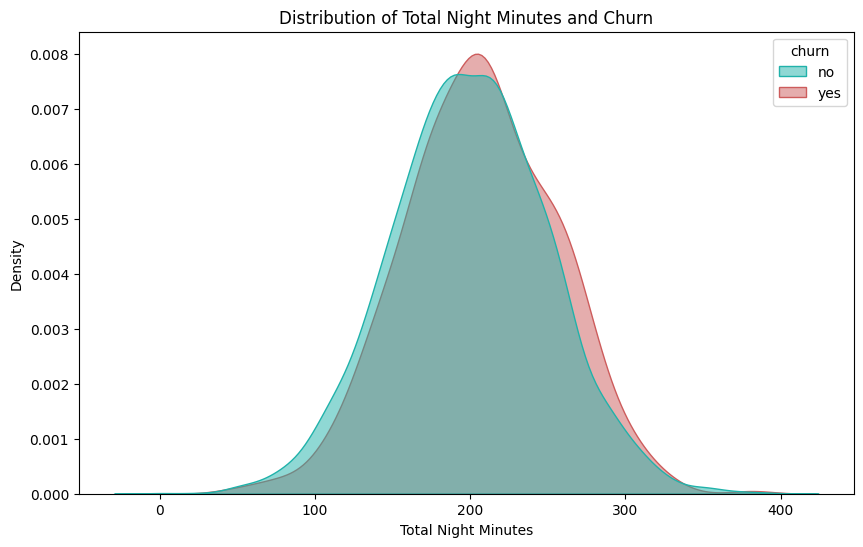

In [26]:
# set figure size
plt.figure(figsize=(10, 6))

# density plot
sns.kdeplot(data=df_train, x='total_night_minutes', hue='churn', fill=True, common_norm=False, alpha=0.5, palette=colors)
plt.title('Distribution of Total Night Minutes and Churn')
plt.xlabel('Total Night Minutes')
plt.ylabel('Density')

# show plot
plt.show()

Based on the total minutes of night calls, there is no noticeable difference between customers who churn and those who don't.

#### 3.7.4. Distribution of Total International Minutes and Churn

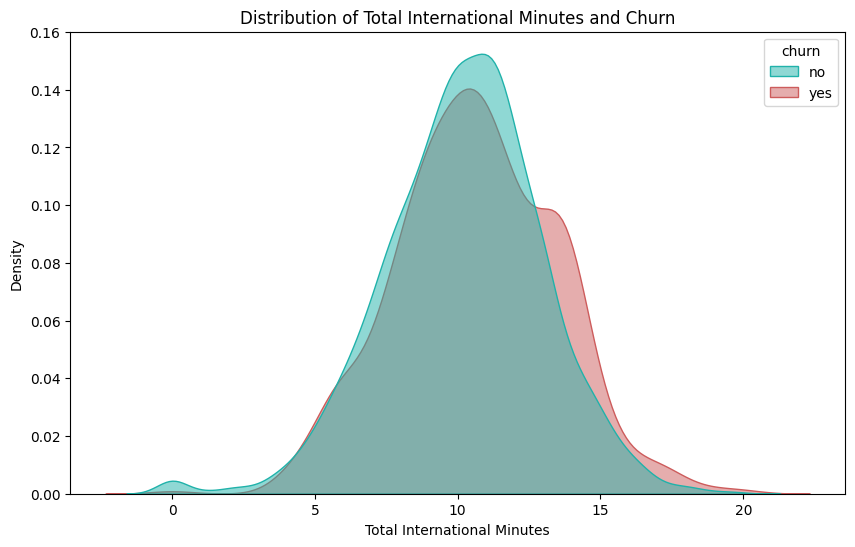

In [27]:
# set figure size
plt.figure(figsize=(10, 6))

# density plot
sns.kdeplot(data=df_train, x='total_intl_minutes', hue='churn', fill=True, common_norm=False, alpha=0.5, palette=colors)
plt.title('Distribution of Total International Minutes and Churn')
plt.xlabel('Total International Minutes')
plt.ylabel('Density')

# show plot
plt.show()

Based on the total minutes of international calls, there is no noticeable difference between customers who churn and those who don't.

## 4. Data Pre-Processing

### 4.1. Missing Value

#### 4.1.1. Training Data

In [ ]:
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

The training data has no missing values.

#### 4.1.2. Testing Data

In [ ]:
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

The testing data has no missing values.

### 4.2. Duplicate Value

#### 4.2.1. Training Data

In [ ]:
df_train.duplicated().sum()

0

The training data has no duplication.

#### 4.2.2. Testing Data

In [ ]:
df_test.duplicated().sum()

0

The testing data has no duplication.

### 4.3. Outlier Detection

#### 4.3.1. Training Data

In [ ]:
# count outliers in a column
def count_outliers(column):
    Q1, Q3 = column.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    min_val = Q1 - 1.5 * IQR
    max_val = Q3 + 1.5 * IQR
    outliers_count = column[(column < min_val) | (column > max_val)].count()
    return outliers_count

# count outliers in all numerical columns
def count_all_outliers(dataframe):
    print('Number of outliers:')
    numerical_columns = dataframe.select_dtypes('number').columns
    for col in numerical_columns:
        outliers_count = count_outliers(dataframe[col])
        print(f'- {col}: {outliers_count}')

# filter outliers
def filter_outliers(dataframe):
    numerical_columns = dataframe.select_dtypes('number').columns
    print(f'\nNumber of rows before filtering outliers: {len(dataframe)}')
    filtered_entries = dataframe.copy()
    for col in numerical_columns:
        Q1, Q3 = dataframe[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        low_limit = Q1 - (IQR * 1.5)
        high_limit = Q3 + (IQR * 1.5)
        filtered_entries = filtered_entries[(filtered_entries[col] >= low_limit) & (filtered_entries[col] <= high_limit)]
    print(f'Number of rows after filtering outliers: {len(filtered_entries)}')
    return filtered_entries

# count outliers
count_all_outliers(df_train)

# filter to remove outliers
df_train = filter_outliers(df_train)

Number of outliers:
- account_length: 20
- number_vmail_messages: 86
- total_day_minutes: 25
- total_day_calls: 28
- total_day_charge: 26
- total_eve_minutes: 34
- total_eve_calls: 24
- total_eve_charge: 34
- total_night_minutes: 37
- total_night_calls: 33
- total_night_charge: 37
- total_intl_minutes: 62
- total_intl_calls: 100
- total_intl_charge: 62
- number_customer_service_calls: 335

Number of rows before filtering outliers: 4250
Number of rows after filtering outliers: 3515


#### 4.3.2. Testing Data

In [ ]:
# count outliers
count_all_outliers(df_test)

# filter to remove outliers
df_test = filter_outliers(df_test)

Number of outliers:
- id: 0
- account_length: 6
- number_vmail_messages: 0
- total_day_minutes: 9
- total_day_calls: 7
- total_day_charge: 9
- total_eve_minutes: 8
- total_eve_calls: 5
- total_eve_charge: 8
- total_night_minutes: 3
- total_night_calls: 8
- total_night_charge: 3
- total_intl_minutes: 10
- total_intl_calls: 18
- total_intl_charge: 10
- number_customer_service_calls: 64

Number of rows before filtering outliers: 750
Number of rows after filtering outliers: 619


### 4.4. Normalization

#### 4.4.1. Training Data

In [ ]:
# normalize numerical columns
def normalization(train):
  for col in df_train[num]:
    train[col] = MinMaxScaler().fit_transform(train[col].values.reshape(len(train), 1))
  return train

In [ ]:
# normalize data
normalization(df_train)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,0.522167,area_code_415,no,yes,0.650,0.436920,0.721154,0.436805,0.484669,0.523364,0.484572,0.702408,0.532710,0.702341,0.748201,0.222222,0.749333,0.333333,no
1,NJ,0.669951,area_code_415,no,no,0.000,0.718116,0.634615,0.718099,0.210196,0.588785,0.209909,0.357035,0.542056,0.357023,0.640288,0.444444,0.640000,0.000000,no
3,OK,0.364532,area_code_415,yes,no,0.000,0.454452,0.625000,0.454398,0.310307,0.700935,0.310300,0.448457,0.700935,0.448161,0.489209,0.222222,0.490667,1.000000,no
5,MO,0.719212,area_code_415,yes,no,0.000,0.421107,0.298077,0.421031,0.143332,0.439252,0.142981,0.542137,0.467290,0.541806,0.273381,0.555556,0.274667,0.000000,no
7,WV,0.689655,area_code_415,yes,yes,0.925,0.770368,0.346154,0.770273,0.582564,0.598131,0.582355,0.973288,0.476636,0.973244,0.568345,0.444444,0.568000,0.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,ND,0.684729,area_code_510,no,no,0.000,0.722585,0.644231,0.722548,0.717769,0.504673,0.717514,0.615500,0.616822,0.615385,0.302158,0.555556,0.304000,0.333333,yes
4245,MT,0.403941,area_code_415,no,no,0.000,0.528704,0.211538,0.528615,0.663096,0.383178,0.662755,0.549285,0.308411,0.549331,0.503597,0.555556,0.504000,0.000000,no
4246,WV,0.354680,area_code_408,no,no,0.000,0.492953,0.394231,0.492821,0.247137,0.327103,0.246849,0.445824,0.401869,0.445652,0.589928,0.555556,0.592000,1.000000,no
4247,NC,0.364532,area_code_408,no,no,0.000,0.468202,0.509615,0.468150,0.475803,0.738318,0.475445,0.231001,0.542056,0.230769,0.258993,0.666667,0.258667,0.333333,no


The data above is normalized data with a scale between 0-1.

#### 4.4.2. Testing Data

In [ ]:
# split categorical and numerical columns
cat_test = df_test.select_dtypes(include='object').columns
num_test = df_test.select_dtypes(include='number').columns

In [ ]:
def normalization(test, num_test, id_column='id'):
    # list of numeric columns expect id
    num_test_excluded = [col for col in num_test if col != id_column]

    # normalize numerical columns expect id
    for col in num_test_excluded:
        test[col] = MinMaxScaler().fit_transform(test[col].values.reshape(-1, 1))

    return test

In [ ]:
# normalize data
normalization(df_test, num_test)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,0.631841,area_code_415,no,yes,0.490196,0.811708,0.59,0.811801,0.498030,0.480392,0.497914,0.670692,0.400000,0.670732,0.489051,0.222222,0.489189,0.333333
1,2,AL,0.582090,area_code_510,yes,no,0.000000,0.656227,0.47,0.656284,0.589441,0.500000,0.589244,0.521405,0.684211,0.521951,0.218978,0.555556,0.218919,0.000000
3,4,VT,0.457711,area_code_510,no,no,0.000000,0.534303,0.63,0.534328,0.579984,0.598039,0.579972,0.249543,0.715789,0.249593,0.350365,0.222222,0.351351,1.000000
4,5,NE,0.860697,area_code_415,no,no,0.000000,0.286726,0.25,0.286686,0.812057,0.607843,0.811776,0.692645,0.652632,0.692683,0.890511,0.444444,0.891892,1.000000
5,6,IL,0.701493,area_code_415,no,no,0.000000,0.139448,0.44,0.139504,0.258865,0.127451,0.258693,0.691914,1.000000,0.691870,0.795620,0.555556,0.794595,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,0.641791,area_code_415,no,no,0.000000,0.268456,0.48,0.268480,0.611899,0.460784,0.611961,0.517014,0.610526,0.517073,0.583942,0.666667,0.583784,0.000000
746,747,WA,0.358209,area_code_408,no,no,0.000000,0.483967,0.67,0.483878,0.786052,0.333333,0.785814,0.660080,0.621053,0.660163,0.656934,0.111111,0.656757,1.000000
747,748,WV,0.751244,area_code_415,no,no,0.000000,0.510067,0.39,0.509980,0.732072,0.225490,0.732035,0.556897,0.631579,0.556911,0.832117,0.111111,0.832432,1.000000
748,749,DC,0.298507,area_code_415,no,no,0.000000,0.347502,0.38,0.347445,0.401103,0.764706,0.401020,0.552506,0.463158,0.552846,0.751825,0.333333,0.751351,0.333333


The data above is normalized data with a scale between 0-1.

### 4.5. Feature Encoding

#### 4.5.1. Training Data

In [ ]:
def feature_encoding(train):
  for col in df_train[cat]:
    print(col, df_train[col].unique())

  # label encoding
  for col in df_train[cat].drop(['state','area_code'], axis=1):
    train[col] = LabelEncoder().fit_transform(train[col])

  # one-hot encoding
  for col in ['area_code']:
    onehots_area_code = pd.get_dummies(train[col], prefix=col)
    train = train.join(onehots_area_code)
    return train

  return train

In [ ]:
df_train = feature_encoding(df_train)

state ['OH' 'NJ' 'OK' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VA' 'TX' 'FL' 'SC' 'WY'
 'HI' 'NH' 'AZ' 'AK' 'MA' 'GA' 'AR' 'WI' 'OR' 'MI' 'DE' 'IN' 'UT' 'CO'
 'CA' 'SD' 'NC' 'MN' 'NM' 'NV' 'DC' 'MD' 'VT' 'KY' 'LA' 'ME' 'MS' 'NE'
 'AL' 'NY' 'WA' 'TN' 'IL' 'KS' 'PA' 'CT' 'ND']
area_code ['area_code_415' 'area_code_408' 'area_code_510']
international_plan ['no' 'yes']
voice_mail_plan ['yes' 'no']
churn ['no' 'yes']


In [ ]:
# show data
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,OH,0.522167,area_code_415,0,1,0.650,0.436920,0.721154,0.436805,0.484669,...,0.532710,0.702341,0.748201,0.222222,0.749333,0.333333,0,False,True,False
1,NJ,0.669951,area_code_415,0,0,0.000,0.718116,0.634615,0.718099,0.210196,...,0.542056,0.357023,0.640288,0.444444,0.640000,0.000000,0,False,True,False
3,OK,0.364532,area_code_415,1,0,0.000,0.454452,0.625000,0.454398,0.310307,...,0.700935,0.448161,0.489209,0.222222,0.490667,1.000000,0,False,True,False
5,MO,0.719212,area_code_415,1,0,0.000,0.421107,0.298077,0.421031,0.143332,...,0.467290,0.541806,0.273381,0.555556,0.274667,0.000000,0,False,True,False
7,WV,0.689655,area_code_415,1,1,0.925,0.770368,0.346154,0.770273,0.582564,...,0.476636,0.973244,0.568345,0.444444,0.568000,0.000000,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,ND,0.684729,area_code_510,0,0,0.000,0.722585,0.644231,0.722548,0.717769,...,0.616822,0.615385,0.302158,0.555556,0.304000,0.333333,1,False,False,True
4245,MT,0.403941,area_code_415,0,0,0.000,0.528704,0.211538,0.528615,0.663096,...,0.308411,0.549331,0.503597,0.555556,0.504000,0.000000,0,False,True,False
4246,WV,0.354680,area_code_408,0,0,0.000,0.492953,0.394231,0.492821,0.247137,...,0.401869,0.445652,0.589928,0.555556,0.592000,1.000000,0,True,False,False
4247,NC,0.364532,area_code_408,0,0,0.000,0.468202,0.509615,0.468150,0.475803,...,0.542056,0.230769,0.258993,0.666667,0.258667,0.333333,0,True,False,False


* International_plan, voice_mail_plan, and churn columns are done with label encoding.
* The area_code column is done with one-hot encoding.

#### 4.5.2. Testing Data

In [ ]:
def feature_encoding(test):
  for col in df_test[cat_test]:
    print(col, df_test[col].unique())

  # label encoding
  for col in df_test[cat_test].drop(['state','area_code'], axis=1):
    test[col] = LabelEncoder().fit_transform(test[col])

  # one-hot encoding
  for col in ['area_code']:
    onehots_area_code = pd.get_dummies(test[col], prefix=col)
    test = test.join(onehots_area_code)
    return test

  return test

In [ ]:
df_test = feature_encoding(df_test)

state ['KS' 'AL' 'VT' 'NE' 'IL' 'GA' 'NJ' 'MN' 'CO' 'TX' 'AK' 'MA' 'MO' 'ID'
 'FL' 'MI' 'WA' 'UT' 'SC' 'IA' 'OK' 'DE' 'NH' 'WY' 'PA' 'AZ' 'MD' 'IN'
 'NM' 'MS' 'SD' 'MT' 'OR' 'ME' 'CA' 'CT' 'AR' 'DC' 'ND' 'WV' 'NY' 'RI'
 'NC' 'HI' 'WI' 'OH' 'VA' 'NV' 'LA' 'TN' 'KY']
area_code ['area_code_415' 'area_code_510' 'area_code_408']
international_plan ['no' 'yes']
voice_mail_plan ['yes' 'no']


In [ ]:
# show data
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,1,KS,0.631841,area_code_415,0,1,0.490196,0.811708,0.59,0.811801,...,0.670692,0.400000,0.670732,0.489051,0.222222,0.489189,0.333333,False,True,False
1,2,AL,0.582090,area_code_510,1,0,0.000000,0.656227,0.47,0.656284,...,0.521405,0.684211,0.521951,0.218978,0.555556,0.218919,0.000000,False,False,True
3,4,VT,0.457711,area_code_510,0,0,0.000000,0.534303,0.63,0.534328,...,0.249543,0.715789,0.249593,0.350365,0.222222,0.351351,1.000000,False,False,True
4,5,NE,0.860697,area_code_415,0,0,0.000000,0.286726,0.25,0.286686,...,0.692645,0.652632,0.692683,0.890511,0.444444,0.891892,1.000000,False,True,False
5,6,IL,0.701493,area_code_415,0,0,0.000000,0.139448,0.44,0.139504,...,0.691914,1.000000,0.691870,0.795620,0.555556,0.794595,0.666667,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,0.641791,area_code_415,0,0,0.000000,0.268456,0.48,0.268480,...,0.517014,0.610526,0.517073,0.583942,0.666667,0.583784,0.000000,False,True,False
746,747,WA,0.358209,area_code_408,0,0,0.000000,0.483967,0.67,0.483878,...,0.660080,0.621053,0.660163,0.656934,0.111111,0.656757,1.000000,True,False,False
747,748,WV,0.751244,area_code_415,0,0,0.000000,0.510067,0.39,0.509980,...,0.556897,0.631579,0.556911,0.832117,0.111111,0.832432,1.000000,False,True,False
748,749,DC,0.298507,area_code_415,0,0,0.000000,0.347502,0.38,0.347445,...,0.552506,0.463158,0.552846,0.751825,0.333333,0.751351,0.333333,False,True,False


* International_plan and voice_mail_plan columns are done with label encoding.
* The area_code column is done with one-hot encoding.

### 4.6. Drop Columns

In [ ]:
unused_columns = ['state', 'area_code']

Removing unnecessary columns, namely state and area_code.

#### 4.6.1. Training Data

In [ ]:
# drop columns
df_train.drop(columns=unused_columns, inplace=True)

In [ ]:
# data info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3515 entries, 0 to 4248
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3515 non-null   float64
 1   international_plan             3515 non-null   int64  
 2   voice_mail_plan                3515 non-null   int64  
 3   number_vmail_messages          3515 non-null   float64
 4   total_day_minutes              3515 non-null   float64
 5   total_day_calls                3515 non-null   float64
 6   total_day_charge               3515 non-null   float64
 7   total_eve_minutes              3515 non-null   float64
 8   total_eve_calls                3515 non-null   float64
 9   total_eve_charge               3515 non-null   float64
 10  total_night_minutes            3515 non-null   float64
 11  total_night_calls              3515 non-null   float64
 12  total_night_charge             3515 non-null   float6

#### 4.6.2. Testing Data

In [ ]:
# drop columns
df_test.drop(columns=unused_columns, inplace=True)

In [ ]:
# data info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 0 to 749
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             619 non-null    int64  
 1   account_length                 619 non-null    float64
 2   international_plan             619 non-null    int64  
 3   voice_mail_plan                619 non-null    int64  
 4   number_vmail_messages          619 non-null    float64
 5   total_day_minutes              619 non-null    float64
 6   total_day_calls                619 non-null    float64
 7   total_day_charge               619 non-null    float64
 8   total_eve_minutes              619 non-null    float64
 9   total_eve_calls                619 non-null    float64
 10  total_eve_charge               619 non-null    float64
 11  total_night_minutes            619 non-null    float64
 12  total_night_calls              619 non-null    float64


### 4.7. Split Train & Test

In [ ]:
# data
X = df_train.drop(['churn'], axis=1)
y = df_train['churn']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Split the data into train data and test data.

### 4.8. Feature Selection

In [ ]:
# fit selector
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_train, y_train)

# selected features
features_select = list(X_train.columns[selector.get_support(indices=True)])
print(features_select)

['international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_charge', 'total_intl_calls']


The column names above are the most influential columns for improving accuracy values.

In [ ]:
# select important features
X_train = X_train[features_select]
X_test = X_test[features_select]

## 5. Modeling

### 5.1. Support Vector Machine (SVM)

In [ ]:
# define pipeline
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

# define parameters
svm_param = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}

# grid
grid_search_svm = GridSearchCV(estimator=svm_pipe, param_grid=svm_param, cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train, y_train)

print("Best parameters: ", grid_search_svm.best_params_)
print("Best score: ", grid_search_svm.best_score_)

# best model
svm_best_model = grid_search_svm.best_estimator_

# accuracy
print('Accuracy: ', svm_best_model.score(X_test, y_test))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters:  {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'poly'}
Best score:  0.9516260162601625
Accuracy:  0.9440758293838862


The best cross-validation score obtained was 0.95. Meanwhile, the accuracy on the test data is 0.94.

### 5.2. Random Forest

In [ ]:
# define pipeline
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# define parameters
rf_param = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# grid
grid_search_rf = GridSearchCV(estimator=rf_pipe, param_grid=rf_param, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

# best model
rf_best_model = grid_search_rf.best_estimator_

# accuracy
print('Accuracy: ', rf_best_model.score(X_test, y_test))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters:  {'rf__bootstrap': True, 'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best score:  0.9577235772357724
Accuracy:  0.9507109004739337


The best cross-validation score obtained was 0.96. Meanwhile, the accuracy on the test data is 0.95.

## 6. Evaluation

In [ ]:
def evaluation(train, x, y):
  # define evaluation result and models
  evaluation = pd.DataFrame()
  models = [svm_best_model, rf_best_model]
  algorithm = ['Support Vector Machine', 'Random Forest']

  for model, algorithm in zip(models, algorithm):
    # predict labels for input data
    y_predict = model.predict(x)

    #calculate evaluation metrics
    metric_value = [
        accuracy_score(y, y_predict)*100,
        precision_score(y, y_predict)*100,
        recall_score(y, y_predict)*100,
        f1_score(y, y_predict)*100
    ]
    metric_value = [f"{value:.2f}%" for value in metric_value]

    # create dataframe
    evaluation_result = pd.DataFrame({
        'Models': [algorithm],
        'Accuracy': [metric_value[0]],
        'Precsion': [metric_value[1]],
        'Recall': [metric_value[2]],
        'F1 Score': [metric_value[3]]
    })
    evaluation = pd.concat([evaluation, evaluation_result], ignore_index=True)
  return evaluation

In [ ]:
evaluation_train = evaluation('train', X_train, y_train)
print(evaluation_train)

                   Models Accuracy Precsion  Recall F1 Score
0  Support Vector Machine   96.14%   93.00%  69.66%   79.66%
1           Random Forest   97.52%  100.00%  77.15%   87.10%


* SVM has an accuracy value of 96.14% with a precision value of 93.00%, recall of 69.66%, and F1 Score of 79.66%.
* Random Forest has an accuracy value of 97.52% with a precision value of 100.00%, recall of 77.15%, and F1 Score of 87.10%.
* In this comparison, the Random Forest model is better than the SVM model.



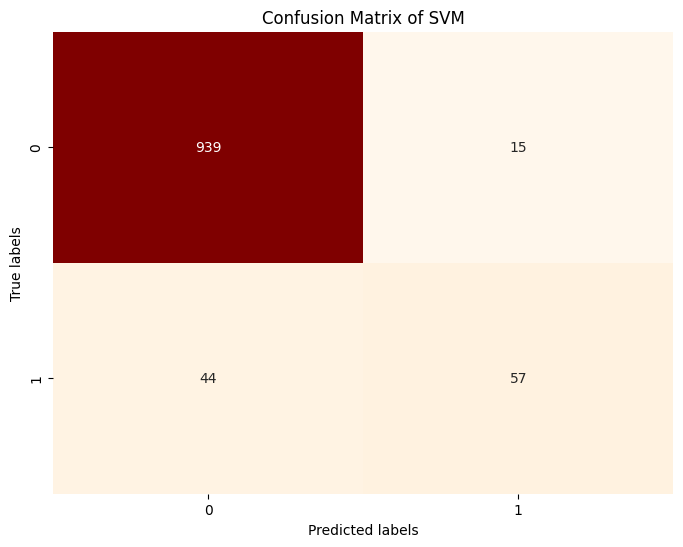

In [ ]:
# confusion matrix of SVM
y_pred_svm = svm_best_model.predict(X_test)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# set figure size
plt.figure(figsize=(8, 6))

# create confusion matrix
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVM')

# show plot
plt.show()

* A value of 939 indicates the number of correct negative predictions.
* A value of 15 indicates the number of incorrect positive predictions.
* A value of 44 indicates the number of incorrect negative predictions.
* A value of 57 indicates the number of correct positive predictions.

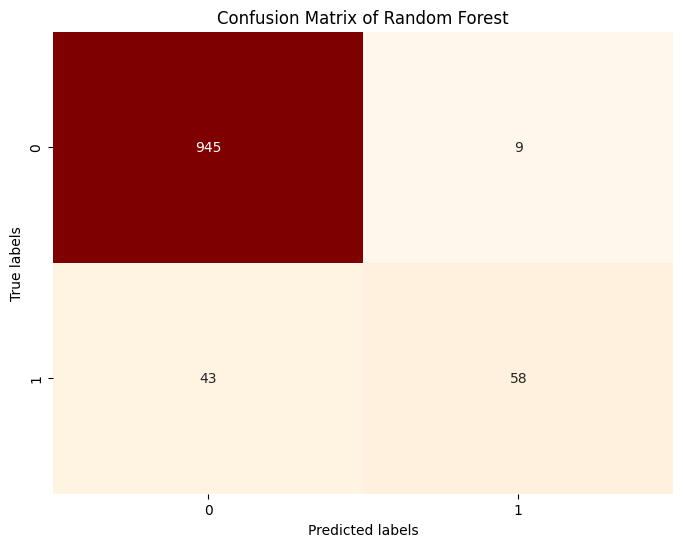

In [ ]:
# confusion matrix of random forest
y_pred_rf = rf_best_model.predict(X_test)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# set figure size
plt.figure(figsize=(8, 6))

# create confusion matrix
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Random Forest')

# show plot
plt.show()

* A value of 945 indicates the number of correct negative predictions.
* A value of 9 indicates the number of incorrect positive predictions.
* A value of 43 indicates the number of incorrect negative predictions.
* A value of 58 indicates the number of correct positive predictions.

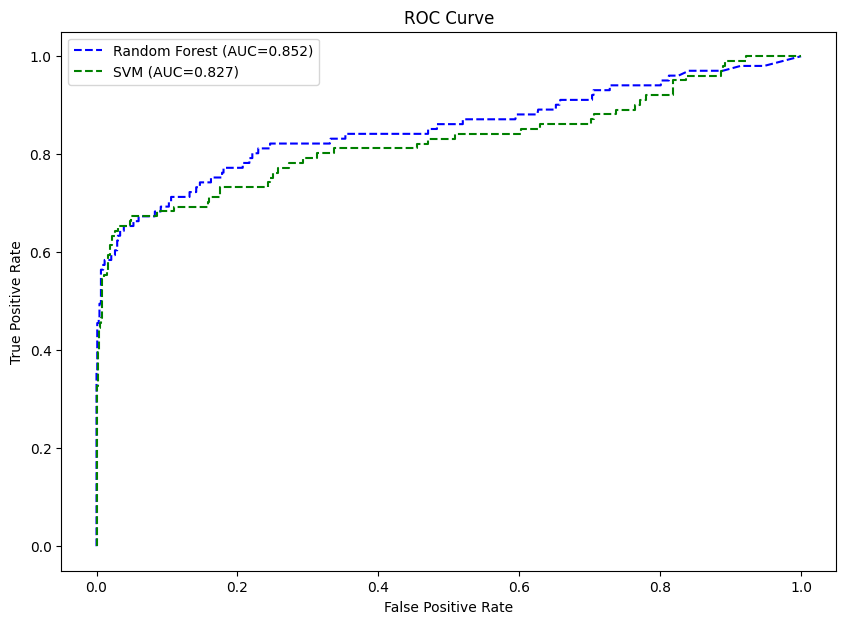

In [ ]:
# plot ROC curves
plt.figure(figsize=(10, 7))

# random forest
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, linestyle='--', color='blue', label=f'Random Forest (AUC={rf_auc:.3f})')

# SVM
svm_probs = svm_best_model.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
plt.plot(svm_fpr, svm_tpr, linestyle='--', color='green', label=f'SVM (AUC={svm_auc:.3f})')

# create plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# show plot
plt.show()

The AUC-ROC curve shows that Random Forest is the most reliable and accurate model to predict customer churn.

## 7. Prediction

In [ ]:
# create model object
rf = RandomForestClassifier()

# train model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# evaluate model
correct_column_order = X_train.columns
data_test_churn = df_test[correct_column_order]
prediction = rf.predict(data_test_churn)

In [ ]:
# merge test data ID with prediction result
submission = pd.DataFrame({
        "id": df_test["id"],
        "churn": ['yes' if p == 1 else 'no' for p in prediction]
    })
submission.head()

,id,churn
0,1,no
1,2,no
3,4,no
4,5,no
5,6,no


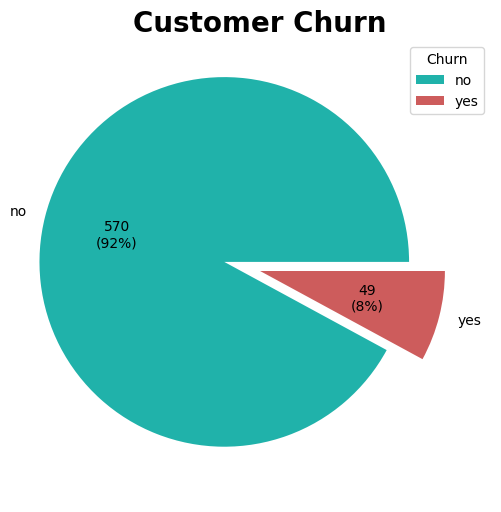

In [ ]:
# set figure size
plt.figure(figsize=(9,6))

# calculate counts of each category in churn
churn = submission.value_counts()

# define colors, explode, and labels
colors = ['lightseagreen', 'indianred']
explode = [0.2, 0]
labels = ['no', 'yes']

# create pie chart
plt.pie(churn, labels=labels, autopct=lambda pct: pie_label(pct, churn), colors=colors, explode=explode, textprops=dict(color='black', fontsize=10))
plt.title("Customer Churn", loc='center', weight='bold', fontsize=20)
plt.legend(labels, title='Churn')

# show chart
plt.show()

There are 8% or 49 customers who are predicted to churn.